In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy as db

from config import password

In [2]:
db_string = 'postgresql://postgres:' + password + '@localhost:5432/Homework_1'

engine = db.create_engine(db_string)

connection = engine.connect()

In [3]:
df = pd.read_sql('''SELECT t.title, ROUND(AVG(s.salary), 2) AS salaries
                    FROM titles AS t
                    LEFT JOIN salaries AS s ON
                    t.emp_no = s.emp_no
                    GROUP BY t.title
                    ORDER BY salaries ASC;''', con = connection)

In [4]:
df

,title,salaries
0,Assistant Engineer,48493.20
1,Senior Engineer,48506.75
2,Engineer,48539.78
3,Technique Leader,48580.51
4,Manager,51531.04
5,Staff,58465.27
6,Senior Staff,58503.29


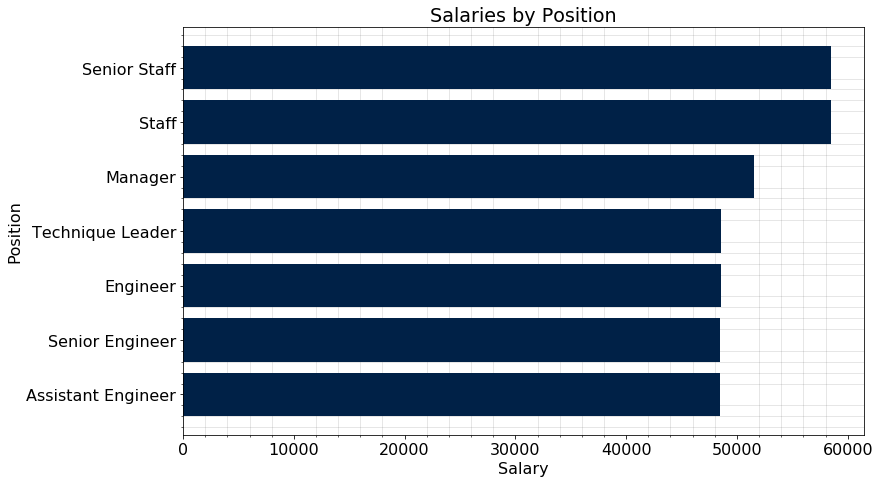

In [6]:
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.axisbelow'] = True

fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.barh(
    df['title'], 
    df['salaries'],
    color = '#002147'
)

ax.set_xlabel('Salary')
ax.set_ylabel('Position')
ax.set_title('Salaries by Position')

plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig('Salaries by Position.png')

plt.show()